In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as stats
import requests
import gmaps
import os

In [12]:
wine_consumption_df = pd.read_csv("Resources/wine-consumption-per-person.csv")
wine_consumption_df=wine_consumption_df.rename(columns={"Indicator:Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) - Beverage Types:Wine":"Wine Consumption per capita (Liters)"})

In [30]:
merged_df = pd.read_csv("../mega_df.csv")
merged_df = merged_df.rename(columns={'continent':'Continent', 'country_code':'Country Code', 'country':'Country', 'consumption_per_capita_(L)':'Alcohol Consumption Per Capita (Liters)', 'climate':'Climate', 'main_export':'Main Export', 'main_industry':'Main Industry', 'region':'Region', 'happy_score':'Happiness Score', 'life_expectancy':'Life Expectancy', 'gdp_per_capita':'GDP per capita', 'mental_health_and_addiction (%)':'Mental Health Disorders (%)'})
len(merged_df)

186

In [7]:
updated_df=merged_df.drop(['index','Unnamed: 0', 'code', 'Main Export', 'Main Industry'], axis=1)
updated_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,South Asia,2.5669,52.590000,7.462861,17.553463
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Middle East and North Africa,5.0051,65.905174,9.537965,14.700388
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,NaN,NaN,NaN,NaN,12.498281


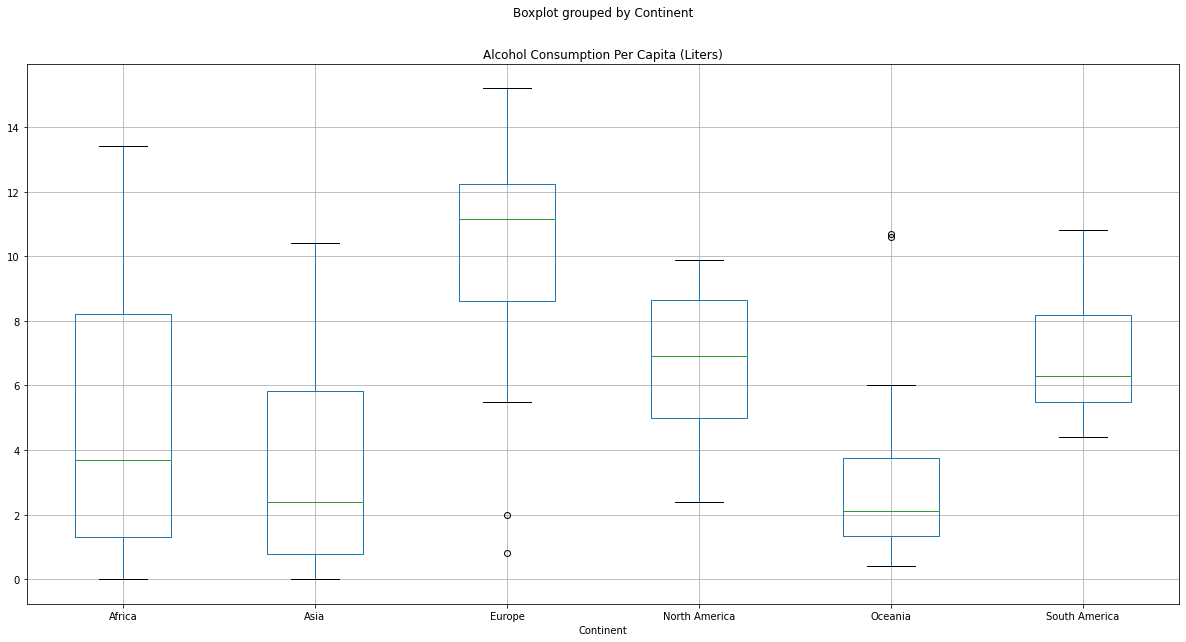

In [16]:
updated_df.boxplot("Alcohol Consumption Per Capita (Liters)", by="Continent", figsize=(20, 10))

In [19]:
group1 = updated_df[updated_df["Continent"] == "Africa"]["Alcohol Consumption Per Capita (Liters)"]
group2 = updated_df[updated_df["Continent"] == "Asia"]["Alcohol Consumption Per Capita (Liters)"]
group3 = updated_df[updated_df["Continent"] == "Europe"]["Alcohol Consumption Per Capita (Liters)"]
group4 = updated_df[updated_df["Continent"] == "North America"]["Alcohol Consumption Per Capita (Liters)"]
group5 = updated_df[updated_df["Continent"] == "Oceania"]["Alcohol Consumption Per Capita (Liters)"]
group6 = updated_df[updated_df["Continent"] == "South America"]["Alcohol Consumption Per Capita (Liters)"]

In [20]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=39.0908735441233, pvalue=5.946781924844183e-19)

In [21]:
stats.ttest_ind(group3, group5)

Ttest_indResult(statistic=6.739906169357296, pvalue=9.301922597184508e-09)

Africa's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Asia's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Europe's potential outliers: 6      0.8
169    2.0
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
North America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)
Oceania's potential outliers: 8      10.6
120    10.7
Name: Alcohol Consumption Per Capita (Liters), dtype: float64
South America's potential outliers: Series([], Name: Alcohol Consumption Per Capita (Liters), dtype: float64)


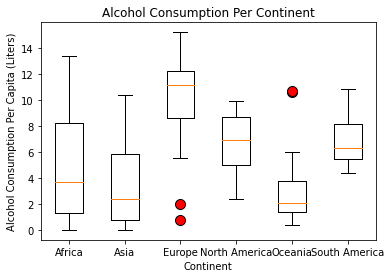

In [22]:
continents = ["Africa", "Asia", "Europe", "North America", "Oceania", "South America"]

# Create empty list to fill with tumor vol data (for plotting)
alcohol_consumption_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for continent in continents:
      
    # Locate the rows which contain mice on each drug and get the tumor volumes
    alcohol_by_continent=updated_df.loc[updated_df["Continent"]==continent, "Alcohol Consumption Per Capita (Liters)"]
    
    # add subset 
    alcohol_consumption_data.append(alcohol_by_continent)

    quartiles = alcohol_by_continent.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    iqr=upper_q-lower_q
    lower_bound=lower_q - (1.5*iqr)
    upper_bound=upper_q + (1.5*iqr)
    outliers=alcohol_by_continent.loc[(alcohol_by_continent<lower_bound)|(alcohol_by_continent>upper_bound)]
    print(f"{continent}'s potential outliers: {outliers}")
    
rate=dict(markerfacecolor='red', markersize=10)
plt.boxplot(alcohol_consumption_data, labels=continents, flierprops=rate)
plt.ylabel('Alcohol Consumption Per Capita (Liters)')
plt.xlabel('Continent')
plt.title('Alcohol Consumption Per Continent')
plt.show()

In [25]:
updated_df_countries_by_continent=updated_df["Continent"].value_counts()
updated_df_countries_by_continent

Africa           53
Europe           46
Asia             40
North America    23
Oceania          12
South America    12
Name: Continent, dtype: int64

In [23]:
alcohol_by_continent_sum=updated_df.groupby("Continent")[["Alcohol Consumption Per Capita (Liters)"]].sum()
alcohol_by_continent_sum

,Alcohol Consumption Per Capita (Liters)
Continent,
Africa,252.7
Asia,137.6
Europe,473.4
North America,157.3
Oceania,42.5
South America,83.2


<ipython-input-24-c37401c2cf16>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff2f53f5220>,
 [Text(0.8467456254153936, 0.7021551437110564, 'Africa'),
  Text(-0.2086293354511101, 1.0800341663064315, 'Asia'),
  Text(-1.0528118350214484, -0.31872753260233183, 'Europe'),
  Text(0.47954029770548146, -0.9899702535311545, 'North America'),
  Text(0.9247119831680095, -0.5957413433575742, 'Oceania'),
  Text(1.0715470782973886, -0.24856962604536018, 'South America')],
 [Text(0.46186125022657826, 0.38299371475148525, '22.0%'),
  Text(-0.11379781933696911, 0.5891095452580534, '12.0%'),
  Text(-0.57426100092079, -0.1738513814194537, '41.3%'),
  Text(0.26156743511208075, -0.5399837746533569, '13.7%'),
  Text(0.5043883544552779, -0.3249498236495859, '3.7%'),
  Text(0.5844802245258482, -0.13558343238837825, '7.3%')])

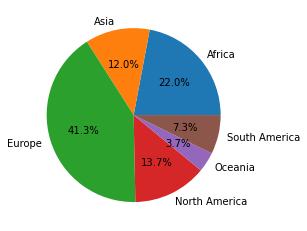

In [24]:
plt.pie(alcohol_by_continent_sum, labels=continents, autopct='%1.1f%%')

<ipython-input-26-3afac84a7c18>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff2f5495550>,
 [Text(1.0051820037963315, 0.44677638617544707, 'Africa'),
  Text(0.46109470062371827, 0.9986949869988954, 'Asia'),
  Text(-0.7673176573487064, 0.7881773992705535, 'Europe'),
  Text(-0.838559517633741, -0.711911465974434, 'North America'),
  Text(0.04807197041236565, -1.098949082378557, 'Oceania'),
  Text(0.9027453275847895, -0.6285307259982054, 'South America')],
 [Text(0.5482810929798171, 0.24369621064115293, '13.3%'),
  Text(0.25150620034020993, 0.5447427201812156, '9.6%'),
  Text(-0.4185369040083852, 0.4299149450566655, '28.7%'),
  Text(-0.4573961005274951, -0.38831534507696397, '19.1%'),
  Text(0.02622107477038126, -0.5994267722064857, '9.9%'),
  Text(0.49240654231897607, -0.3428349414535665, '19.4%')])

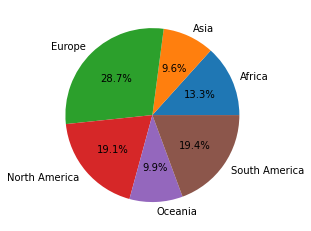

In [26]:
alcohol_by_continent_mean=updated_df.groupby("Continent")[["Alcohol Consumption Per Capita (Liters)"]].mean()
plt.pie(alcohol_by_continent_mean, labels=continents, autopct='%1.1f%%')

In [27]:
agg_alcohol_df=updated_df.groupby("Continent")["Alcohol Consumption Per Capita (Liters)"].agg(['mean','median', 'var', 'std', 'sem'])
agg_alcohol_df

,mean,median,var,std,sem
Continent,,,,,
Africa,4.767925,3.70,14.059913,3.749655,0.515055
Asia,3.440000,2.40,9.578872,3.094975,0.489359
Europe,10.291304,11.15,8.688367,2.947604,0.434600
North America,6.839130,6.90,4.957036,2.226440,0.464245
Oceania,3.541667,2.10,13.048106,3.612216,1.042757
South America,6.933333,6.30,4.344242,2.084285,0.601681


## Adding Wine Data

In [31]:
merged_updated_timepoint_wine_df = wine_latest_timepoint_per_country.merge(wine_consumption_df, on = ["Entity", "Year"], how="left")
merged_updated_timepoint_wine_df.head()

,Entity,Year,Code,Wine Consumption per capita (Liters)
0,Afghanistan,2013,AFG,0.00
1,Albania,2014,ALB,1.14
2,Algeria,2013,DZA,0.22
3,Andorra,2013,AND,4.29
4,Angola,2014,AGO,1.32


In [33]:
wine_average_consumption_per_country=wine_consumption_df.groupby("Entity")[["Wine Consumption per capita (Liters)"]].mean()
wine_average_consumption_per_country.sample(5)

,Wine Consumption per capita (Liters)
Entity,
Papua New Guinea,0.036863
Canada,1.129630
Trinidad and Tobago,0.135185
Israel,0.773333
Bahrain,0.226279


In [34]:
merged_updated_timepoint_average_wine_df = merged_updated_timepoint_wine_df.merge(wine_average_consumption_per_country, on = ["Entity"], how="left")
merged_updated_timepoint_average_wine_df=merged_updated_timepoint_average_wine_df.rename(columns={"Wine Consumption per capita (Liters)_x":"Wine Consumption at Latest Timepoint(L)", "Wine Consumption per capita (Liters)_y":"Wine Consumption Average Over The Years(L)", "Year":"Latest Year for Wine Consumption Data"})
merged_updated_timepoint_average_wine_df.sample(5)

,Entity,Latest Year for Wine Consumption Data,Code,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
126,North Macedonia,2014,MKD,0.26,0.748696
117,Nauru,2010,NRU,0.16,0.057500
76,Iceland,2014,ISL,2.03,1.038889
36,Colombia,2014,COL,0.05,0.057037
169,Togo,2011,TGO,0.33,0.241961


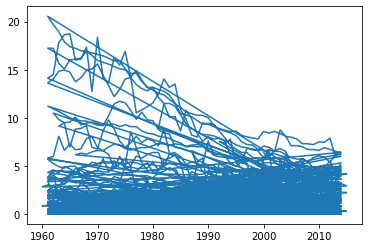

In [52]:
plt.plot(wine_consumption_df["Year"], wine_consumption_df["Wine Consumption per capita (Liters)"])
plt.title="Wine Consumption Over The Years"
plt.show()

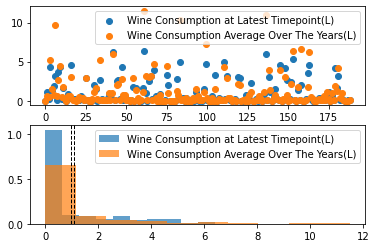

In [35]:
# Scatter Plot of Data
last_timepoint_wine=merged_updated_timepoint_average_wine_df["Wine Consumption at Latest Timepoint(L)"]
average_wine=merged_updated_timepoint_average_wine_df["Wine Consumption Average Over The Years(L)"]
    
plt.subplot(2,1,1)
plt.scatter(range(len(last_timepoint_wine)), last_timepoint_wine, label="Wine Consumption at Latest Timepoint(L)")
plt.scatter(range(len(average_wine)), average_wine, label="Wine Consumption Average Over The Years(L)")
plt.legend()

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(last_timepoint_wine, 10, density=True, alpha=0.7, label="Wine Consumption at Latest Timepoint(L)")
plt.hist(average_wine, 10, density=True, alpha=0.7, label="Wine Consumption Average Over The Years(L)")
plt.axvline(last_timepoint_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(average_wine.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend() 

In [36]:
stats.ttest_ind(last_timepoint_wine, average_wine, equal_var=False)

Ttest_indResult(statistic=-0.6190622697626872, pvalue=0.5362811196901257)

In [44]:
merged_with_wine_df = updated_df.merge(merged_updated_timepoint_average_wine_df, left_on="Country", right_on="Entity", how="inner")
merged_with_wine_df = merged_with_wine_df.drop(['Code', 'Entity', 'Latest Year for Wine Consumption Data', 'Wine Consumption Average Over The Years(L)'], axis=1)
len(merged_with_wine_df)

186

In [47]:
merged_with_wine_df=merged_with_wine_df.rename(columns={"Wine Consumption at Latest Timepoint(L)":"Wine Consumption per capita (Liters)"})
merged_with_wine_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,South Asia,2.5669,52.590000,7.462861,17.553463,0.00
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,0.22
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869,4.29
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,NaN,NaN,NaN,NaN,12.498281,1.32


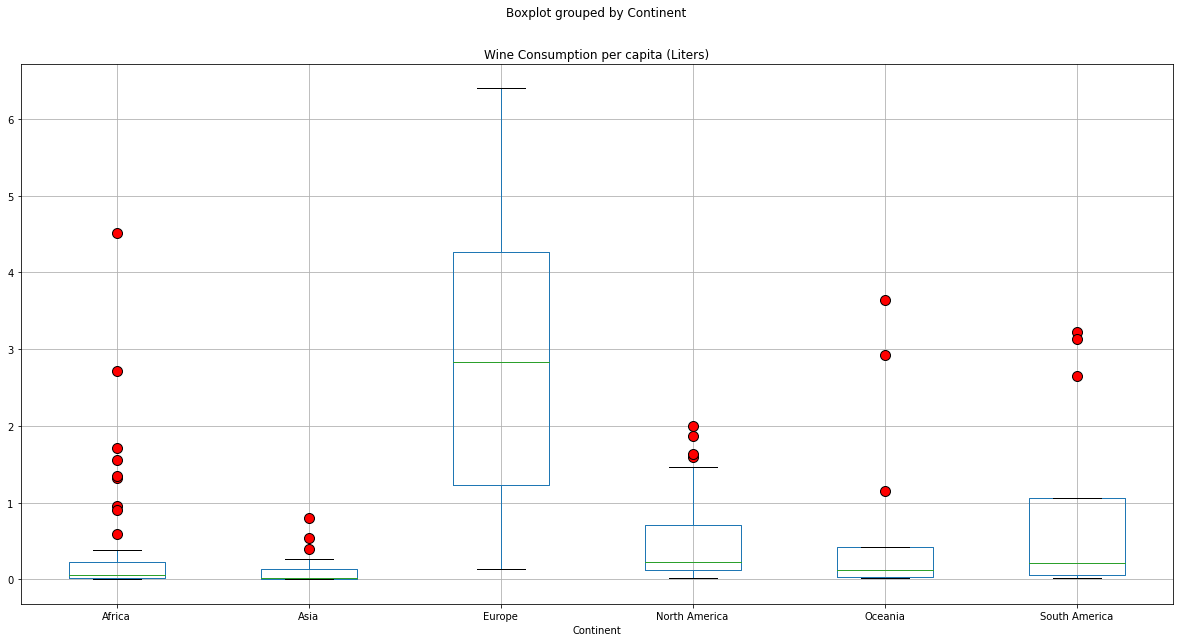

In [50]:
merged_with_wine_df.boxplot("Wine Consumption per capita (Liters)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [51]:
merged_with_wine_europe_df=merged_with_wine_df.loc[(merged_with_wine_df["Continent"]=="Europe")]
merged_with_wine_europe_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",NaN,NaN,NaN,NaN,14.726869,4.29
6,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,0.23
9,Europe,AUT,Austria,11.6,"temperate; continental, cloudy; cold winters w...",Western Europe,7.2942,73.002502,10.742824,14.648111,4.37
13,Europe,ARM,Armenia,5.5,"highland continental, hot summers, cold winters",Commonwealth of Independent States,4.6768,66.750656,9.100476,10.644284,0.13


In [54]:
wine_by_continent_sum=merged_with_wine_df.groupby("Continent")[["Wine Consumption per capita (Liters)"]].sum()
wine_by_continent_sum

,Wine Consumption per capita (Liters)
Continent,
Africa,19.33
Asia,3.77
Europe,128.76
North America,12.95
Oceania,8.47
South America,10.62


<ipython-input-55-d635609c1daa>:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff2f55d0550>,
 [Text(1.0405690428721233, 0.3566736141294919, 'Africa'),
  Text(0.8234672245199254, 0.7293159330094544, 'Asia'),
  Text(-1.0871964742690565, 0.1673434382846632, 'Europe'),
  Text(0.7063943836309732, -0.8432122951989123, 'North America'),
  Text(0.9613367470084627, -0.5346322650674828, 'Oceania'),
  Text(1.0819467125776006, -0.1984724442901918, 'South America')],
 [Text(0.5675831142938853, 0.19454924407063193, '10.5%'),
  Text(0.44916394064723203, 0.39780869073242964, '2.1%'),
  Text(-0.5930162586922125, 0.09127823906436174, '70.0%'),
  Text(0.38530602743507625, -0.45993397919940665, '7.0%'),
  Text(0.5243654983682523, -0.29161759912771784, '4.6%'),
  Text(0.5901527523150547, -0.10825769688555915, '5.8%')])

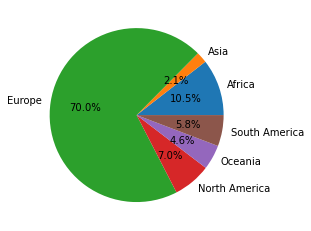

In [55]:
plt.pie(wine_by_continent_sum, labels=continents, autopct='%1.1f%%')

<ipython-input-58-932e0fa876a9>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x7ff2f721e910>,
 [Text(1.0754393318094824, 0.23114982932542724, 'Africa'),
  Text(0.9766376964107641, 0.5061410968786041, 'Asia'),
  Text(-0.6091785234187155, 0.9159156765802153, 'Europe'),
  Text(-0.6237980449763113, -0.9060220742806061, 'North America'),
  Text(0.14652527511625277, -1.0901973875184745, 'Oceania'),
  Text(0.9580077791020227, -0.5405747822272237, 'South America')],
 [Text(0.5866032718960813, 0.12608172508659668, '6.7%'),
  Text(0.5327114707695076, 0.276076961933784, '1.7%'),
  Text(-0.3322791945920266, 0.49959036904375376, '51.7%'),
  Text(-0.3402534790779879, -0.49419385869851234, '10.4%'),
  Text(0.07992287733613786, -0.5946531204646224, '13.0%'),
  Text(0.5225496976920123, -0.29485897212394013, '16.4%')])

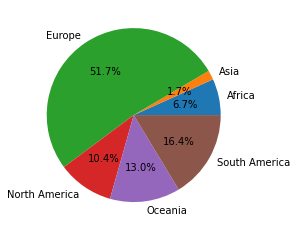

In [58]:
wine_by_continent_mean=merged_with_wine_df.groupby("Continent")[["Wine Consumption per capita (Liters)"]].mean()
plt.pie(wine_by_continent_mean, labels=continents, autopct='%1.1f%%')

In [59]:
grouped_continent_wine_percentage=wine_by_continent_sum.values/alcohol_by_continent_sum.values*100
grouped_continent_wine_percentage

array([[ 7.64938662],
       [ 2.73982558],
       [27.19898606],
       [ 8.23267641],
       [19.92941176],
       [12.76442308]])

## Looking at correlations between Alcohol Consumption and GDP, Life Expectancy, Happiness Score and Mental Health

In [60]:
gdp_and_life_expectancy_df=merged_with_wine_df.dropna(subset=['GDP per capita', 'Life Expectancy'])
len(gdp_and_life_expectancy_df)

141

In [61]:
gdp_and_life_expectancy_df_countries_by_continent=gdp_and_life_expectancy_df["Continent"].value_counts()
gdp_and_life_expectancy_df_countries_by_continent

Europe           43
Africa           39
Asia             34
North America    13
South America    10
Oceania           2
Name: Continent, dtype: int64

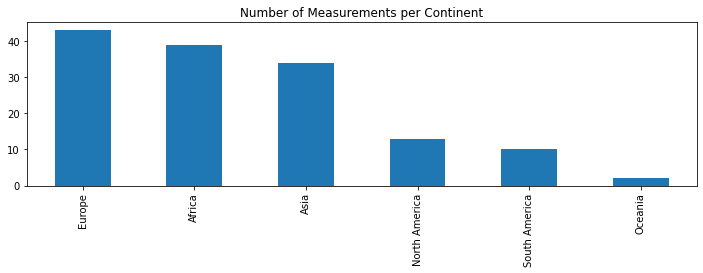

In [69]:
gdp_and_life_expectancy_df_countries_by_continent.plot(kind='bar', figsize=(12,3), title ='Number of Measurements per Continent')

In [70]:
gdp_and_life_expectancy_df.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,6.480142,5.497109,64.637501,9.309033,13.068401,1.085816
std,4.112111,1.112771,6.814233,1.192886,1.892776,1.633237
min,0.000000,2.566900,45.200001,6.492642,10.067097,0.000000
25%,2.800000,4.729300,59.599152,8.350645,11.630930,0.020000
50%,6.600000,5.541500,66.404343,9.500369,12.526669,0.170000
75%,9.800000,6.228500,69.002548,10.263742,14.536026,1.670000
max,15.200000,7.808700,76.804581,11.450681,18.495605,6.400000


## Looking at correlations between Alcohol Consumption and GDP, Life Expectancy, Happiness Score and Mental Health per Continent

In [71]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Alcohol Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [73]:
happiness_score_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Happiness Score"]].mean()
happiness_score_mean

,Happiness Score
Continent,
Africa,4.441672
Asia,5.282953
Europe,6.231049
North America,6.184008
Oceania,7.261200
South America,5.939710


The r-value is: 0.18116385485317182


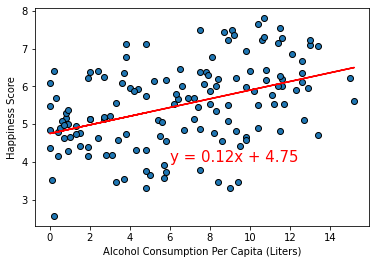

In [75]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,4))

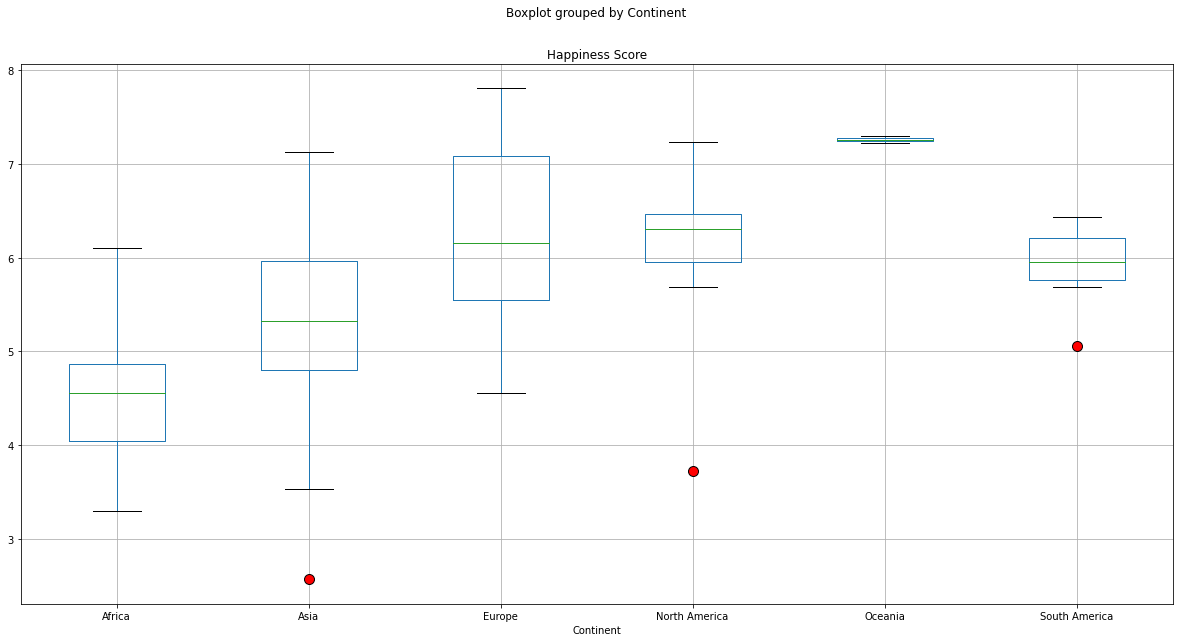

In [85]:
gdp_and_life_expectancy_df.boxplot("Happiness Score", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [76]:
life_expectancy_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Life Expectancy"]].mean()
life_expectancy_by_continent_mean

,Life Expectancy
Continent,
Africa,56.636795
Asia,65.107686
Europe,69.805096
North America,66.825558
Oceania,73.403584
South America,67.423274


The r-value is: 0.15718368589991474


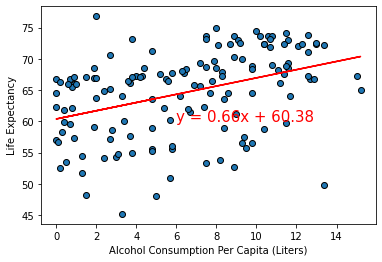

In [77]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Life Expectancy']
plot_linear_regression(x_values,y_values,'Life Expectancy',(6,60))

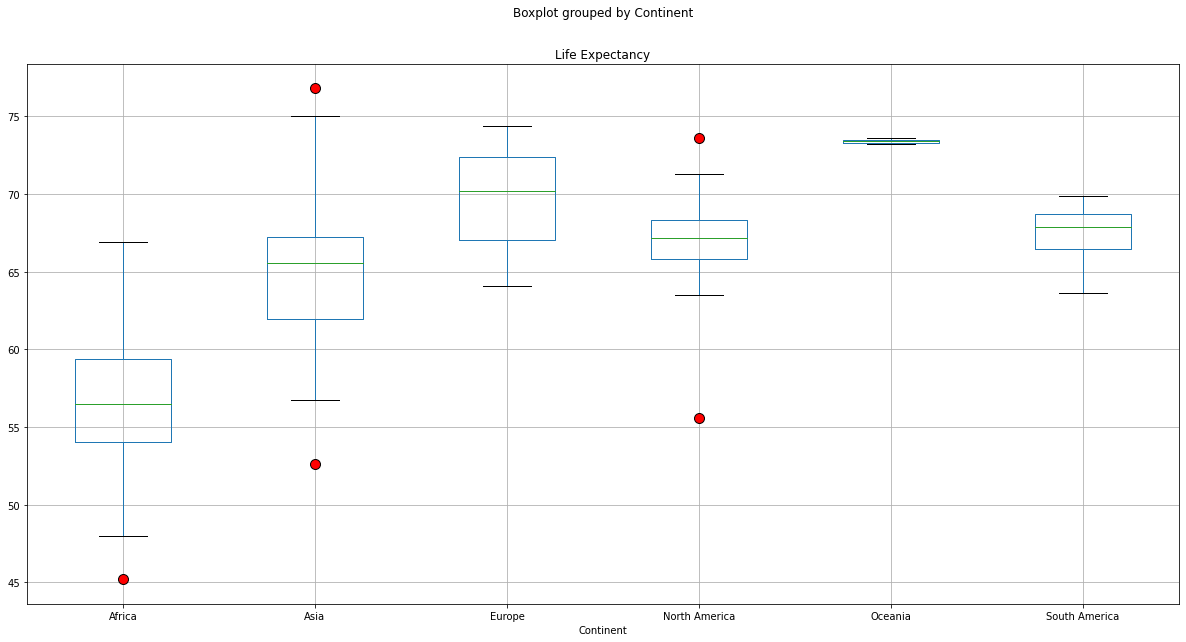

In [86]:
gdp_and_life_expectancy_df.boxplot("Life Expectancy", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [78]:
gdp_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["GDP per capita"]].mean()
gdp_by_continent_mean

,GDP per capita
Continent,
Africa,8.079819
Asia,9.376013
Europe,10.243561
North America,9.400182
Oceania,10.610770
South America,9.477927


The r-value is: 0.20507265852518977


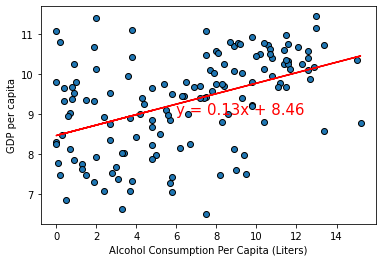

In [79]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['GDP per capita']
plot_linear_regression(x_values,y_values,'GDP per capita',(6,9))

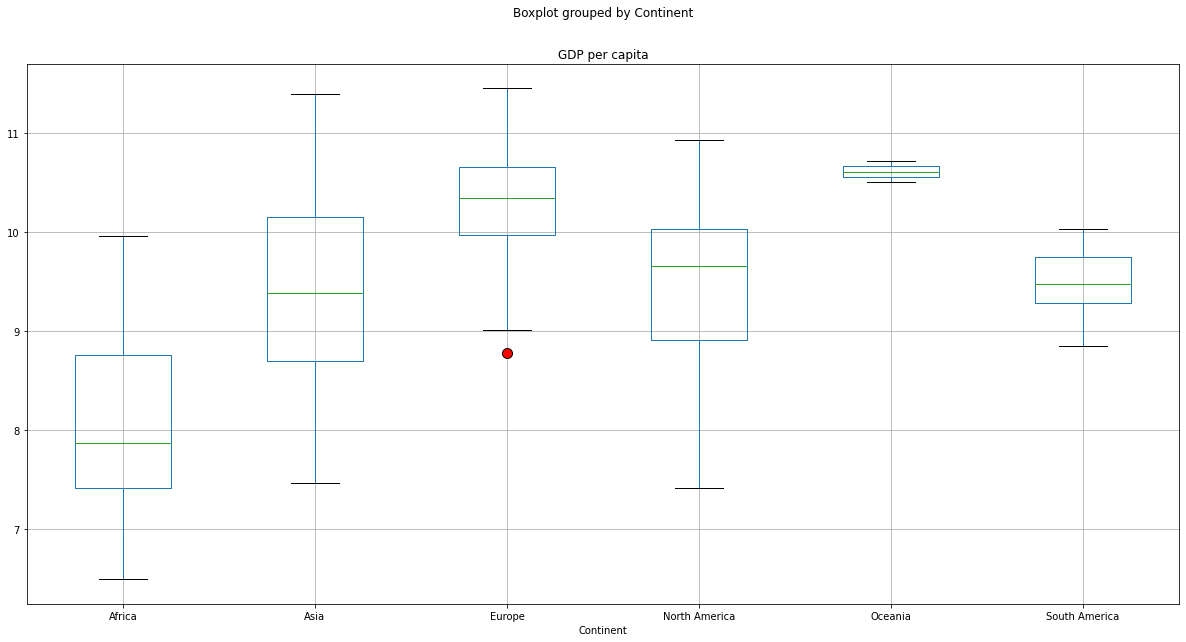

In [87]:
gdp_and_life_expectancy_df.boxplot("GDP per capita", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

In [81]:
mental_health_by_continent_mean=gdp_and_life_expectancy_df.groupby("Continent")[["Mental Health Disorders (%)"]].mean()
mental_health_by_continent_mean

,Mental Health Disorders (%)
Continent,
Africa,12.644170
Asia,13.062704
Europe,13.324556
North America,12.461781
Oceania,18.286749
South America,13.385746


The r-value is: 0.007723890876234616


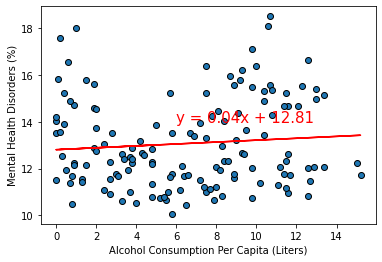

In [82]:
x_values=gdp_and_life_expectancy_df['Alcohol Consumption Per Capita (Liters)']
y_values=gdp_and_life_expectancy_df['Mental Health Disorders (%)']
plot_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(6,14))

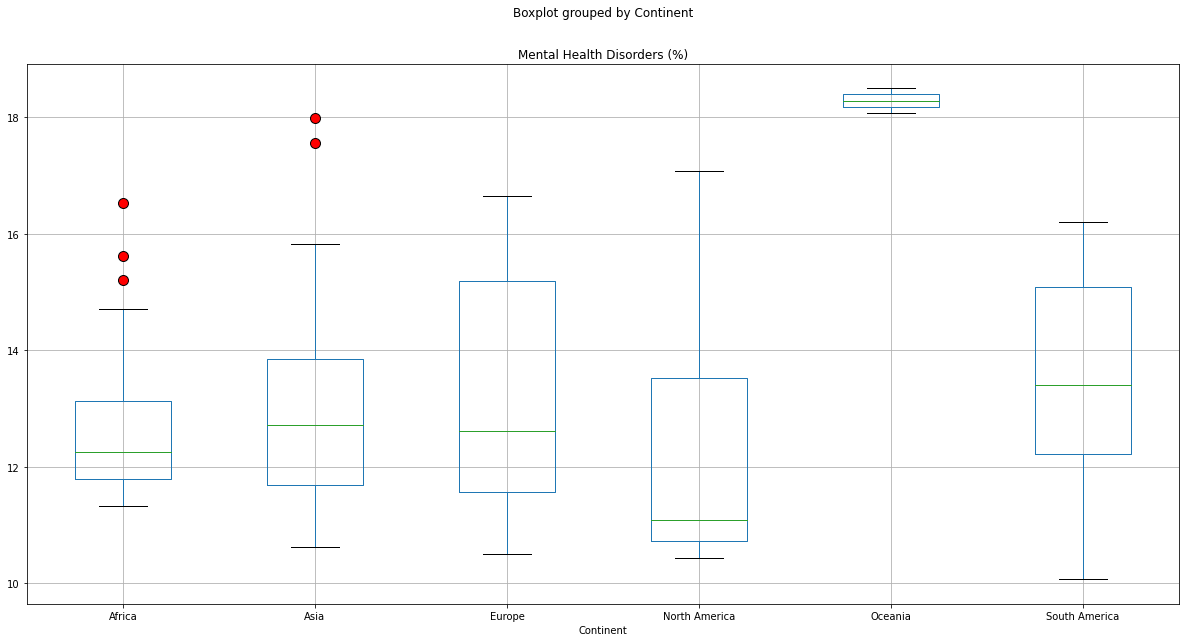

In [88]:
gdp_and_life_expectancy_df.boxplot("Mental Health Disorders (%)", by="Continent", figsize=(20, 10), flierprops=dict(markerfacecolor='red', markersize=10))

## Looking at correlations between Wine Consumption and GDP, Life Expectancy, Happiness Score and Mental Health in Europe

In [94]:
only_europe_data = gdp_and_life_expectancy_df.loc[(gdp_and_life_expectancy_df["Continent"]=="Europe")]
only_europe_data.sample(5)

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
161,Europe,CHE,Switzerland,11.5,"temperate, but varies with altitude; cold, clo...",Western Europe,7.5599,74.102448,10.979933,15.221312,4.57
73,Europe,HUN,Hungary,11.4,"temperate; cold, cloudy, humid winters; warm s...",Central and Eastern Europe,6.0004,67.609970,10.249244,11.758843,3.35
124,Europe,NOR,Norway,7.5,"temperate along coast, modified by North Atlan...",Western Europe,7.4880,73.200783,11.087804,16.368074,2.22
55,Europe,EST,Estonia,11.6,"maritime; wet, moderate winters, cool summers",Central and Eastern Europe,6.0218,68.604958,10.340017,12.616894,1.65
99,Europe,LUX,Luxembourg,13.0,"modified continental with mild winters, cool s...",Western Europe,7.2375,72.599998,11.450681,14.964661,4.75


In [90]:
only_europe_data.describe()

,Alcohol Consumption Per Capita (Liters),Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,10.223256,6.231049,69.805096,10.243561,13.324556,2.828140
std,2.960360,0.904860,3.198465,0.591456,1.994888,1.787353
min,0.800000,4.560700,64.100456,8.776714,10.495815,0.130000
25%,8.650000,5.546050,67.055027,9.970097,11.573121,1.320000
50%,11.100000,6.159000,70.214905,10.340017,12.616894,2.870000
75%,12.200000,7.084750,72.403881,10.656453,15.182889,4.260000
max,15.200000,7.808700,74.402710,11.450681,16.640201,6.400000


In [91]:
def plot_wine_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel('Wine Consumption Per Capita (Liters)')
    plt.ylabel(title)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.09271745557343575


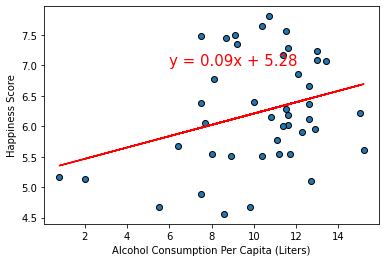

In [96]:
x_values=only_europe_data['Alcohol Consumption Per Capita (Liters)']
y_values=only_europe_data['Happiness Score']
plot_linear_regression(x_values,y_values,'Happiness Score',(6,7))

The r-value is: 0.12392540422792007


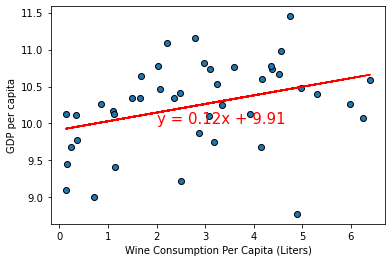

In [93]:
x_values=only_europe_data['Wine Consumption per capita (Liters)']
y_values=only_europe_data['GDP per capita']
plot_wine_linear_regression(x_values,y_values,'GDP per capita',(2,10))

The r-value is: 0.31563005361696045


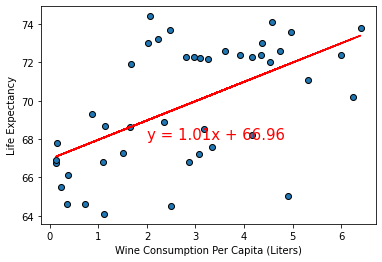

In [381]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['Life Expectancy']
plot_wine_linear_regression(x_values,y_values,'Life Expectancy',(2,68))

The r-value is: 0.27600880504650505


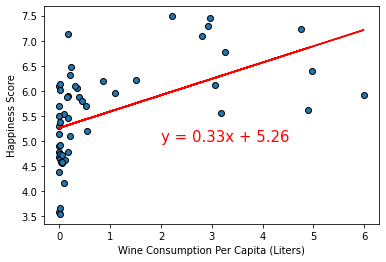

In [352]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['Happiness Score']
plot_wine_linear_regression(x_values,y_values,'Happiness Score',(2,5))

The r-value is: 0.10099913915868275


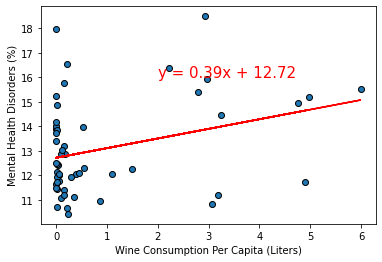

In [354]:
x_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
y_values=merged_with_wine_europe_df['Mental Health Disorders (%)']
plot_wine_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(2,16))

In [382]:
def plot_social_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values, edgecolors='k')
    plt.plot(x_values,regress_values, "r-")
    plt.xlabel(title)
    plt.ylabel('Wine Consumption Per Capita (Liters)')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

The r-value is: 0.12392540422792007


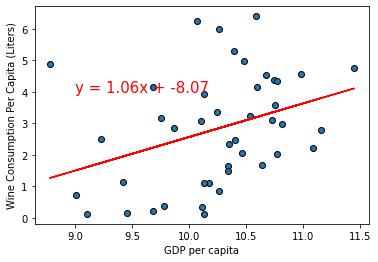

In [388]:
x_values=merged_with_wine_europe_df['GDP per capita']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'GDP per capita',(9,4))

The r-value is: 0.31563005361696045


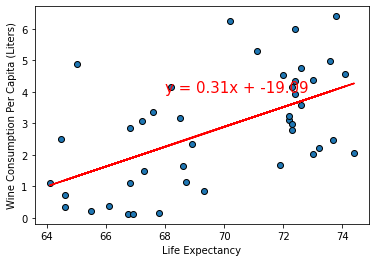

In [390]:
x_values=merged_with_wine_europe_df['Life Expectancy']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'Life Expectancy',(68,4))

The r-value is: 0.14178448062606994


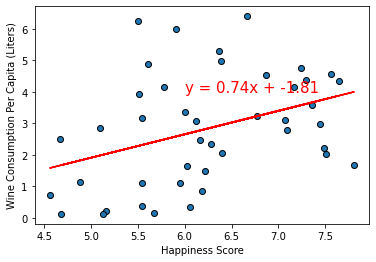

In [392]:
x_values=merged_with_wine_europe_df['Happiness Score']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'Happiness Score',(6,4))

In [28]:
x_values=merged_with_wine_europe_df['Mental Health Disorders (%)']
y_values=merged_with_wine_europe_df['Wine Consumption at Latest Timepoint(L)']
plot_social_linear_regression(x_values,y_values,'Mental Health Disorders (%)',(12,4))

NameError: name 'merged_with_wine_europe_df' is not defined

In [395]:
merged_with_wine_nonull_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Latest Year for Wine Consumption Data,Wine Consumption at Latest Timepoint(L),Wine Consumption Average Over The Years(L)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,2013,0.00,0.000377
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,2014,1.14,0.601698
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,2013,0.22,0.429245
3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,2013,0.23,0.459167
4,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235,2014,3.22,9.673333


In [399]:
merged_with_wine_final_df=merged_with_wine_nonull_df.drop(['Latest Year for Wine Consumption Data', 'Wine Consumption Average Over The Years(L)'], axis=1)
merged_with_wine_final_df.head()

,Continent,Country Code,Country,Alcohol Consumption Per Capita (Liters),Climate,Main Industry,Region,Happiness Score,Life Expectancy,GDP per capita,Mental Health Disorders (%),Wine Consumption per capita (Liters)
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,0.00
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,1.14
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,0.22
3,Europe,AZE,Azerbaijan,0.8,"dry, semiarid steppe",petroleum and natural gas,Commonwealth of Independent States,5.1648,65.508400,9.687727,10.495815,0.23
4,South America,ARG,Argentina,9.8,mostly temperate; arid in southeast; subantarc...,food processing,Latin America and Caribbean,5.9747,68.803802,9.810955,15.491235,3.22


In [401]:
merged_with_wine_final_df.to_csv("merged_with_wine_final_df.csv")